# Importing Libraries

In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


# Load Dataset
- dataset link: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

In [41]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

C:\Users\Harun\AppData\Local\Temp\ipykernel_22244\1148430634.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("train.csv")


In [42]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [43]:
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Eliminating Missing Data and Unneeded Column

In [45]:
# Eksik değerleri aynı ID'ye sahip geçmiş aylardaki bilgilerle doldurma
train_df['Monthly_Inhand_Salary'] = train_df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
test_df['Monthly_Inhand_Salary'] = test_df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


C:\Users\Harun\AppData\Local\Temp\ipykernel_22244\2260235310.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df['Monthly_Inhand_Salary'] = train_df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\Harun\AppData\Local\Temp\ipykernel_22244\2260235310.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df['Monthly_Inhand_Salary'] = test_df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [46]:
# gereksiz kolonları kaldırma
drop_columns = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Type_of_Loan', 'Changed_Credit_Limit','Credit_History_Age','Num_of_Delayed_Payment','Num_Credit_Inquiries','Occupation','Num_of_Loan']
train_df = train_df.drop(columns=drop_columns, axis=1)
test_df = test_df.drop(columns=drop_columns, axis=1)

In [47]:
train_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,3,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,19114.12,1824.843333,3,4,3,-1,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,19114.12,1824.843333,3,4,3,3,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,19114.12,1824.843333,3,4,3,5,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,19114.12,1824.843333,3,4,3,6,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,23,_,502.38,34.663572,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25,39628.99,3359.415833,4,6,7,18,_,502.38,40.565631,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25,39628.99,3359.415833,4,6,5729,27,Good,502.38,41.255522,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,25,39628.99,3359.415833,4,6,7,20,Good,502.38,33.638208,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [48]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Annual_Income             100000 non-null  object 
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Delay_from_due_date       100000 non-null  int64  
 7   Credit_Mix                100000 non-null  object 
 8   Outstanding_Debt          100000 non-null  object 
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Payment_of_Min_Amount     100000 non-null  object 
 11  Total_EMI_per_month       100000 non-null  float64
 12  Amount_invested_monthly   95521 non-null   object 
 13  Payment_Behaviour         100000 non-null  ob

# Categorical Value Converting 

In [10]:
categorical=train_df.select_dtypes("object").columns
categorical

Index(['Age', 'Annual_Income', 'Credit_Mix', 'Outstanding_Debt',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [11]:
for cat in train_df.select_dtypes("object").columns:
    print(train_df[cat].value_counts())

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
6618       1
3155       1
5063       1
2875       1
4347       1
Name: count, Length: 1788, dtype: int64
Annual_Income
17273.83      16
20867.67      16
36585.12      16
9141.63       15
95596.35      15
              ..
48706.1_       1
108484.38_     1
14855994.0     1
54392.16_      1
34081.38_      1
Name: count, Length: 18940, dtype: int64
Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64
Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
482.88      16
            ..
494.51_      1
807.65_      1
290.39_      1
2866.5_      1
1283.37_     1
Name: count, Length: 13178, dtype: int64
Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64
Amount_invested_monthly
__10000__             4305
0.0                    169
167.1638651610451        1
80.41529543900253        1
118.28022162236736  

In [12]:
# Hedef değişkeni ordinal encoding ile sayısal hale getirme
credit_score_mapping = {
    "Poor": 0,
    "Standard": 1,
    "Good": 2
}

train_df["Credit_Score_Numeric"] = train_df["Credit_Score"].map(credit_score_mapping)

train_df.drop(columns=["Credit_Score"], inplace=True)


In [13]:
# "_" değerlerini NaN olarak değiştirme
train_df["Monthly_Balance"] = train_df["Monthly_Balance"].replace("__-333333333333333333333333333__", np.nan)
test_df["Monthly_Balance"] = test_df["Monthly_Balance"].replace("__-333333333333333333333333333__", np.nan)

# Label Encoding (Standard: 2, Good: 1, Bad: 0 olarak kodlansın)
label_encoder = LabelEncoder()
train_df["Monthly_Balance"] = label_encoder.fit_transform(train_df["Monthly_Balance"].astype(str))
test_df["Monthly_Balance"] = label_encoder.fit_transform(test_df["Monthly_Balance"].astype(str))

# KNNImputer ile eksik değerleri doldurma
imputer = KNNImputer(n_neighbors=5)
train_df["Monthly_Balance"] = imputer.fit_transform(train_df[["Monthly_Balance"]])
test_df["Monthly_Balance"] = imputer.fit_transform(test_df[["Monthly_Balance"]])



In [14]:
# Eksik değerleri NaN ile değiştirme
train_df["Payment_Behaviour"] = train_df["Payment_Behaviour"].replace("!@9#%8", np.nan)
test_df["Payment_Behaviour"] = test_df["Payment_Behaviour"].replace("!@9#%8", np.nan)

# Harcama düzeyi kodlaması: Low_spent -> 0, High_spent -> 1
train_df["Spending_Level"] = train_df["Payment_Behaviour"].apply(lambda x: 1 if isinstance(x, str) and "High_spent" in x else 0)
test_df["Spending_Level"] = test_df["Payment_Behaviour"].apply(lambda x: 1 if isinstance(x, str) and "High_spent" in x else 0)

# Ödeme değer düzeyi kodlaması: Small -> 0, Medium -> 1, Large -> 2
train_df["Value_Level"] = train_df["Payment_Behaviour"].apply(lambda x: 
    0 if isinstance(x, str) and "Small_value_payments" in x else 
    (1 if isinstance(x, str) and "Medium_value_payments" in x else 2))

# Ödeme değer düzeyi kodlaması: Small -> 0, Medium -> 1, Large -> 2
test_df["Value_Level"] = test_df["Payment_Behaviour"].apply(lambda x: 
    0 if isinstance(x, str) and "Small_value_payments" in x else 
    (1 if isinstance(x, str) and "Medium_value_payments" in x else 2))

# Yeni numerik encoding içeren sütunu oluşturma
train_df["Payment_Behaviour_Numeric"] = train_df["Spending_Level"] * 3 + train_df["Value_Level"]
test_df["Payment_Behaviour_Numeric"] = test_df["Spending_Level"] * 3 + test_df["Value_Level"]

# KNNImputer ile eksik değerleri doldurma
imputer = KNNImputer(n_neighbors=5)
train_df["Payment_Behaviour_Numeric"] = imputer.fit_transform(train_df[["Payment_Behaviour_Numeric"]])
test_df["Payment_Behaviour_Numeric"] = imputer.fit_transform(test_df[["Payment_Behaviour_Numeric"]])

# Sayısal değerleri tekrar kategorik değerlere çevirme
reverse_mapping = {
    0: "Low_spent_Small_value_payments",
    1: "Low_spent_Medium_value_payments",
    2: "Low_spent_Large_value_payments",
    3: "High_spent_Small_value_payments",
    4: "High_spent_Medium_value_payments",
    5: "High_spent_Large_value_payments"
}

train_df["Payment_Behaviour"] = train_df["Payment_Behaviour_Numeric"].round().astype(int).map(reverse_mapping)
test_df["Payment_Behaviour"] = test_df["Payment_Behaviour_Numeric"].round().astype(int).map(reverse_mapping)

# Gereksiz sütunları kaldırma
train_df.drop(columns=["Spending_Level", "Value_Level", "Payment_Behaviour"], inplace=True)
test_df.drop(columns=["Spending_Level", "Value_Level", "Payment_Behaviour"], inplace=True)


In [15]:
# "_" değerlerini NaN olarak değiştirme
train_df["Amount_invested_monthly"] = train_df["Amount_invested_monthly"].replace("__10000__", "10000")
test_df["Amount_invested_monthly"] = test_df["Amount_invested_monthly"].replace("__10000__", "10000")

# Label Encoding (Standard: 2, Good: 1, Bad: 0 olarak kodlansın)
label_encoder = LabelEncoder()
train_df["Amount_invested_monthly"] = label_encoder.fit_transform(train_df["Amount_invested_monthly"].astype(str))
test_df["Amount_invested_monthly"] = label_encoder.fit_transform(test_df["Amount_invested_monthly"].astype(str))

# KNNImputer ile eksik değerleri doldurma
imputer = KNNImputer(n_neighbors=5)
train_df["Amount_invested_monthly"] = imputer.fit_transform(train_df[["Amount_invested_monthly"]])
test_df["Amount_invested_monthly"] = imputer.fit_transform(test_df[["Amount_invested_monthly"]])


In [16]:
# "_" değerlerini NaN olarak değiştirme
train_df["Payment_of_Min_Amount"] = train_df["Payment_of_Min_Amount"].replace("NM", np.nan)
test_df["Payment_of_Min_Amount"] = test_df["Payment_of_Min_Amount"].replace("NM", np.nan)

# Label Encoding (Standard: 2, Good: 1, Bad: 0 olarak kodlansın)
label_encoder = LabelEncoder()
train_df["Payment_of_Min_Amount"] = label_encoder.fit_transform(train_df["Payment_of_Min_Amount"].astype(str))
test_df["Payment_of_Min_Amount"] = label_encoder.fit_transform(test_df["Payment_of_Min_Amount"].astype(str))

# KNNImputer ile eksik değerleri doldurma
imputer = KNNImputer(n_neighbors=5)
train_df["Payment_of_Min_Amount"] = imputer.fit_transform(train_df[["Payment_of_Min_Amount"]])
test_df["Payment_of_Min_Amount"] = imputer.fit_transform(test_df[["Payment_of_Min_Amount"]])


In [ ]:
# Outstanding_Debt sütununu sayısal hale getirme
train_df["Outstanding_Debt"] = pd.to_numeric(train_df["Outstanding_Debt"], errors='coerce')
test_df["Outstanding_Debt"] = pd.to_numeric(test_df["Outstanding_Debt"], errors='coerce')

In [18]:
# "_" değerlerini NaN olarak değiştirme
train_df.loc[:, "Credit_Mix"] = train_df["Credit_Mix"].replace("_", np.nan)
test_df.loc[:, "Credit_Mix"] = test_df["Credit_Mix"].replace("_", np.nan)

# Label Encoding (Standard: 2, Good: 1, Bad: 0 olarak kodlansın)
label_encoder = LabelEncoder()
label_encoder.fit(train_df["Credit_Mix"].astype(str))  # Sadece train verisinde fit işlemi yapılır

# Hem train hem test setine transform işlemi uygulanır
train_df["Credit_Mix"] = label_encoder.transform(train_df["Credit_Mix"].astype(str))
test_df["Credit_Mix"] = label_encoder.transform(test_df["Credit_Mix"].astype(str))

# KNNImputer ile eksik değerleri doldurma
imputer = KNNImputer(n_neighbors=5)
train_df["Credit_Mix"] = imputer.fit_transform(train_df[["Credit_Mix"]]).ravel()
test_df["Credit_Mix"] = imputer.transform(test_df[["Credit_Mix"]]).ravel()


In [ ]:
# Annual_Income sütununu sayısal hale getirme
train_df["Annual_Income"] = pd.to_numeric(train_df["Annual_Income"], errors='coerce')
test_df["Annual_Income"] = pd.to_numeric(test_df["Annual_Income"], errors='coerce')

# KNN Imputer nesnesini oluşturma
imputer = KNNImputer(n_neighbors=5)

# NaN değerleri KNN ile doldurma
train_df["Annual_Income"] = imputer.fit_transform(train_df[["Annual_Income"]])
test_df["Annual_Income"] = imputer.fit_transform(test_df[["Annual_Income"]])



In [20]:
# Yaş sütununu sayısal hale getirme
train_df["Age"] = pd.to_numeric(train_df["Age"], errors='coerce')
test_df["Age"] = pd.to_numeric(test_df["Age"], errors='coerce')

# 18 ile 100 yaş aralığında olmayan satırları filtreleyip silme
train_df = train_df[(train_df["Age"] >= 18) & (train_df["Age"] <= 100)]
test_df = test_df[(test_df["Age"] >= 18) & (test_df["Age"] <= 100)]

In [ ]:
# KNN Imputer nesnesini oluşturma
imputer = KNNImputer(n_neighbors=5)

# NaN değerleri KNN ile doldurma
train_df["Outstanding_Debt"] = imputer.fit_transform(train_df[["Outstanding_Debt"]])
test_df["Outstanding_Debt"] = imputer.fit_transform(test_df[["Outstanding_Debt"]])

C:\Users\Harun\AppData\Local\Temp\ipykernel_22244\3594242531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Outstanding_Debt"] = imputer.fit_transform(train_df[["Outstanding_Debt"]])


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86937 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        86937 non-null  float64
 1   Annual_Income              86937 non-null  float64
 2   Monthly_Inhand_Salary      86937 non-null  float64
 3   Num_Bank_Accounts          86937 non-null  int64  
 4   Num_Credit_Card            86937 non-null  int64  
 5   Interest_Rate              86937 non-null  int64  
 6   Delay_from_due_date        86937 non-null  int64  
 7   Credit_Mix                 86937 non-null  float64
 8   Outstanding_Debt           86937 non-null  float64
 9   Credit_Utilization_Ratio   86937 non-null  float64
 10  Payment_of_Min_Amount      86937 non-null  float64
 11  Total_EMI_per_month        86937 non-null  float64
 12  Amount_invested_monthly    86937 non-null  float64
 13  Monthly_Balance            86937 non-null  float64


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43788 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        43788 non-null  float64
 1   Annual_Income              43788 non-null  float64
 2   Monthly_Inhand_Salary      43766 non-null  float64
 3   Num_Bank_Accounts          43788 non-null  int64  
 4   Num_Credit_Card            43788 non-null  int64  
 5   Interest_Rate              43788 non-null  int64  
 6   Delay_from_due_date        43788 non-null  int64  
 7   Credit_Mix                 43788 non-null  float64
 8   Outstanding_Debt           43788 non-null  float64
 9   Credit_Utilization_Ratio   43788 non-null  float64
 10  Payment_of_Min_Amount      43788 non-null  float64
 11  Total_EMI_per_month        43788 non-null  float64
 12  Amount_invested_monthly    43788 non-null  float64
 13  Monthly_Balance            43788 non-null  float64


In [27]:
test_df=test_df.dropna()

In [28]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Age                          0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Delay_from_due_date          0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Monthly_Balance              0
Credit_Score_Numeric         0
Payment_Behaviour_Numeric    0
dtype: int64
Age                          0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Delay_from_due_date          0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Monthly_Balance              0
Payment_Behaviour_Numeric    0
dtype: int64


# Numerical Values Standartization

In [29]:
train_df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score_Numeric', 'Payment_Behaviour_Numeric'],
      dtype='object')

In [ ]:
# Standardize edilmesi gereken tüm numerik sütunları seçelim
numeric_columns = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Credit_Mix',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
    'Payment_Behaviour_Numeric'
]

# StandardScaler nesnesi oluşturma
scaler = StandardScaler()

# Belirtilen sütunları standardize etme
train_df[numeric_columns] = scaler.fit_transform(train_df[numeric_columns])
test_df[numeric_columns] = scaler.fit_transform(test_df[numeric_columns])

C:\Users\Harun\AppData\Local\Temp\ipykernel_22244\469526409.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[numeric_columns] = scaler.fit_transform(train_df[numeric_columns])


# Detecting Outliers

In [ ]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = np.percentile(df[col], 25)  # 1. çeyrek (Q1)
        Q3 = np.percentile(df[col], 75)  # 3. çeyrek (Q3)
        IQR = Q3 - Q1  # IQR hesapla
        
        lower_bound = Q1 - 1.5 * IQR  # Alt sınır
        upper_bound = Q3 + 1.5 * IQR  # Üst sınır
        
        # Aykırı değerleri bul
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = outlier_indices.tolist()
    
    return outliers

# Kullanım
outliers_iqr = detect_outliers_iqr(train_df, numeric_columns)

# Aykırı değerlerin sayısını göster
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

print("**************")
# Kullanım
outliers_iqr = detect_outliers_iqr(test_df, numeric_columns)

# Aykırı değerlerin sayısını göster
for col, indices in outliers_iqr.items():
    print(f"{col}: {len(indices)} outliers detected")

Age: 5 outliers detected
Annual_Income: 834 outliers detected
Monthly_Inhand_Salary: 1691 outliers detected
Num_Bank_Accounts: 1161 outliers detected
Num_Credit_Card: 1979 outliers detected
Interest_Rate: 1767 outliers detected
Delay_from_due_date: 3286 outliers detected
Credit_Mix: 0 outliers detected
Outstanding_Debt: 5666 outliers detected
Credit_Utilization_Ratio: 4 outliers detected
Payment_of_Min_Amount: 0 outliers detected
Total_EMI_per_month: 5984 outliers detected
Amount_invested_monthly: 0 outliers detected
Monthly_Balance: 0 outliers detected
Payment_Behaviour_Numeric: 0 outliers detected
**************
Age: 2 outliers detected
Annual_Income: 416 outliers detected
Monthly_Inhand_Salary: 865 outliers detected
Num_Bank_Accounts: 544 outliers detected
Num_Credit_Card: 1038 outliers detected
Interest_Rate: 848 outliers detected
Delay_from_due_date: 1686 outliers detected
Credit_Mix: 0 outliers detected
Outstanding_Debt: 2834 outliers detected
Credit_Utilization_Ratio: 0 outliers

In [ ]:
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

# Train ve test veri setlerinde aykırı değerleri kırp
train_df_capped = cap_outliers(train_df, numeric_columns)
test_df_capped = cap_outliers(test_df, numeric_columns)

C:\Users\Harun\AppData\Local\Temp\ipykernel_22244\3852306213.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
C:\Users\Harun\AppData\Local\Temp\ipykernel_22244\3852306213.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
C:\Users\Harun\AppData\Local\Temp\ipykernel_22244\3852306213.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

# Train-Test-Split , Model Training and Performance : Random Forest

In [ ]:
# Bağımsız ve bağımlı değişkenleri tanımlama
X= train_df.drop(columns="Credit_Score_Numeric")
y = train_df["Credit_Score_Numeric"]

X_train,X_test , y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Random Forest Modeli oluşturma
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitme
rf_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = rf_model.predict(X_test)

# Model başarımını ölçme
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Random Forest Model Accuracy: 0.7708
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      4844
           1       0.79      0.80      0.79      9329
           2       0.71      0.69      0.70      3215

    accuracy                           0.77     17388
   macro avg       0.76      0.75      0.76     17388
weighted avg       0.77      0.77      0.77     17388



In [ ]:
# test_df için tahmin yap
test_df["Credit_Score_Numeric"] = rf_model.predict(test_df)

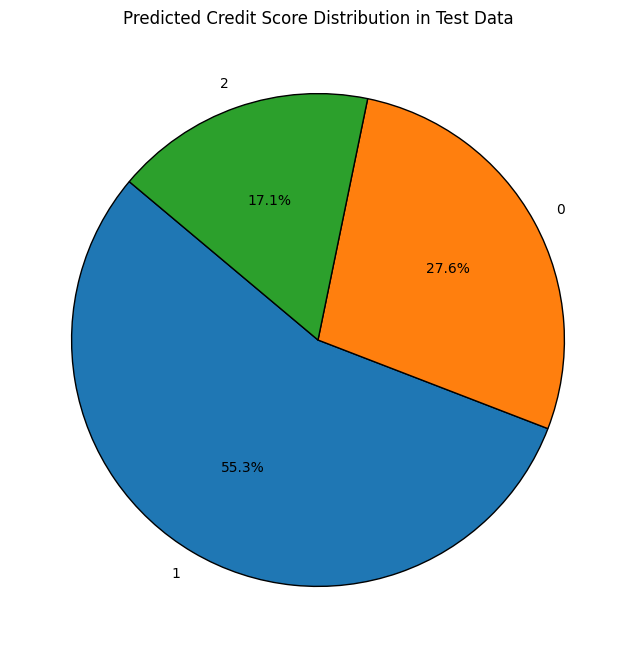

In [ ]:
# Tahmin edilen kredi skorlarının dağılımını al
credit_score_counts = test_df["Credit_Score_Numeric"].value_counts()

# Pie chart 
plt.figure(figsize=(8, 8))
plt.pie(
    credit_score_counts, 
    labels=credit_score_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Predicted Credit Score Distribution in Test Data")
plt.show()

# Hyperparametre Tuning : RandomizedSearchCV

In [36]:
# Hiperparametreler için grid tanımlama
param_grid = {
    'n_estimators': [100, 200, 300],  # Ağaç sayısı
    'max_depth': [10, 20, 30],  # Maksimum derinlik
    'min_samples_split': [2, 5, 10],  # Bölme için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4]  # Yaprak başına minimum örnek
}

# Random Forest Modeli
rf = RandomForestClassifier(random_state=42)

# GridSearchCV ile en iyi hiperparametreleri bulma
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi modeli seçme
best_rf = grid_search.best_estimator_

# Test verisi ile tahmin yapma
y_pred_best = best_rf.predict(X_test)

# Model doğruluğunu ölçme
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Optimized Random Forest Model Accuracy: {best_accuracy:.4f}")
print(classification_report(y_test, y_pred_best))

# En iyi parametreleri gösterme
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Optimized Random Forest Model Accuracy: 0.7734
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4844
           1       0.80      0.80      0.80      9329
           2       0.71      0.70      0.71      3215

    accuracy                           0.77     17388
   macro avg       0.76      0.76      0.76     17388
weighted avg       0.77      0.77      0.77     17388

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [37]:
X_test_final = test_df[X_train.columns]  # Sadece eğitimde kullanılan sütunları al

# En iyi model ile tahmin yapma
test_df["Credit_Score_Numeric_bestt"] = best_rf.predict(X_test_final)

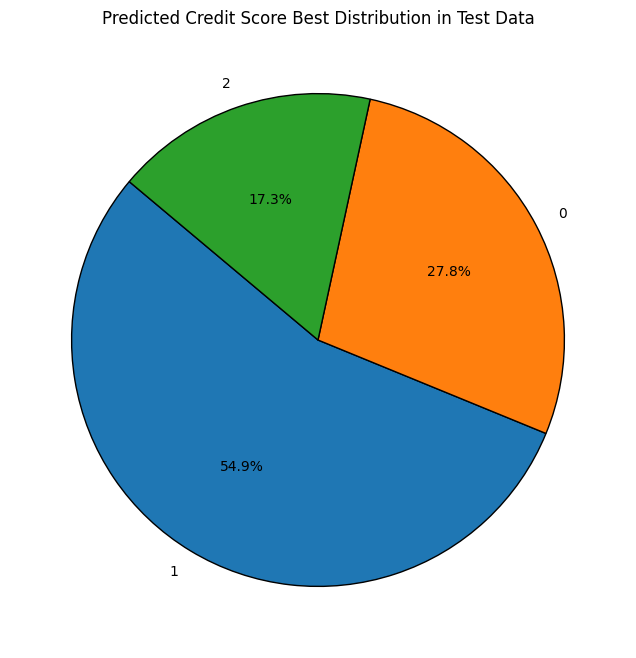

In [38]:
# Tahmin edilen kredi skorlarının dağılımını al
credit_score_counts = test_df["Credit_Score_Numeric_bestt"].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    credit_score_counts, 
    labels=credit_score_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Predicted Credit Score Best Distribution in Test Data")
plt.show()